In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.layers import Input, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../../data/fashion_mnist/fashion-mnist_train.csv')
df.head(3)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0


In [3]:
train = df.drop('label', axis=1, inplace=False)
label = df['label']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(train, label, test_size=0.3, random_state=32, stratify=label)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [5]:
IMAGE_SIZE = 28

input_shape = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 1))
x = Conv2D(filters=32, kernel_size=3, padding='same', strides=1, activation='relu')(input_shape)
x = Conv2D(filters=32, kernel_size=3, padding='same', strides=1, activation='relu')(x)
x = MaxPooling2D(2)(x)
x = Conv2D(filters=64, kernel_size=3, padding='same', strides=1, activation='relu')(x)
x = Conv2D(filters=64, kernel_size=3, padding='same', strides=1, activation='relu')(x)
x = MaxPooling2D(2)(x)
x = Conv2D(filters=128, kernel_size=3, padding='same', strides=1, activation='relu')(x)
x = Conv2D(filters=128, kernel_size=3, padding='same', strides=1, activation='relu')(x)
x = MaxPooling2D(2)(x)
x = Conv2D(filters=256, kernel_size=3, padding='same', strides=1, activation='relu')(x)
x = Conv2D(filters=256, kernel_size=3, padding='same', strides=1, activation='relu')(x)


x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(300, activation='relu')(x)
x = Dropout(rate=0.2)(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=input_shape, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                             

In [6]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

X_train_scaled = X_train_scaled.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)
X_test_scaled = X_test_scaled.reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1)

es = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5, verbose=1, mode='min', restore_best_weights=True)
rd = ReduceLROnPlateau(moniotr='val_loss', factor=0.2, patience=3, verbose=1, mode='min')

history = model.fit(X_train_scaled, y_train, batch_size=32, epochs=50, validation_split=0.3, callbacks=[es, rd])

Epoch 1/50
919/919 [==============================] - 16s 10ms/step - loss: 0.8193 - accuracy: 0.6975 - val_loss: 0.5692 - val_accuracy: 0.7866 - lr: 1.0000e-04
Epoch 2/50
919/919 [==============================] - 9s 9ms/step - loss: 0.4909 - accuracy: 0.8214 - val_loss: 0.4286 - val_accuracy: 0.8406 - lr: 1.0000e-04
Epoch 3/50
919/919 [==============================] - 8s 9ms/step - loss: 0.3988 - accuracy: 0.8536 - val_loss: 0.3789 - val_accuracy: 0.8552 - lr: 1.0000e-04
Epoch 4/50
919/919 [==============================] - 8s 9ms/step - loss: 0.3513 - accuracy: 0.8706 - val_loss: 0.3637 - val_accuracy: 0.8682 - lr: 1.0000e-04
Epoch 5/50
919/919 [==============================] - 9s 10ms/step - loss: 0.3213 - accuracy: 0.8819 - val_loss: 0.3282 - val_accuracy: 0.8747 - lr: 1.0000e-04
Epoch 6/50
919/919 [==============================] - 9s 10ms/step - loss: 0.2938 - accuracy: 0.8908 - val_loss: 0.3071 - val_accuracy: 0.8834 - lr: 1.0000e-04
Epoch 7/50
919/919 [======================

In [10]:
model.evaluate(X_test_scaled, y_test)

563/563 [==============================] - 3s 4ms/step - loss: 0.2469 - accuracy: 0.9110


[0.24693739414215088, 0.9110000133514404]

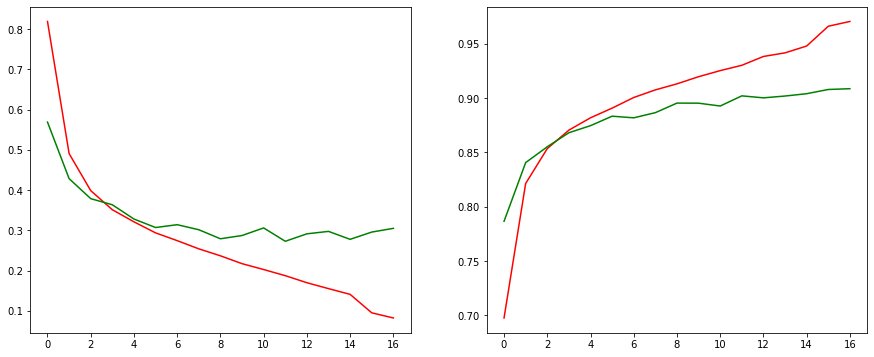

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].plot(history.history['loss'], color='r', label='train_loss')
ax[0].plot(history.history['val_loss'], color='g', label='val_loss')

ax[1].plot(history.history['accuracy'], color='r', label='train_acc')
ax[1].plot(history.history['val_accuracy'], color='g', label='val_lossval_acc')